# Introduction
Thousands of houses are sold everyday. There are some questions every buyer asks himself like: What is the actual price that this house deserves? Am I paying a fair price? In this paper, a machine learning model is proposed to predict a house price based on data related to the house (its size, the year it was built in, etc.). During the development and evaluation of our model, we will show the code used for each step followed by its output. This will facilitate the reproducibility of our work. In this study, Python programming language with a number of Python packages will be used.



# Goals of the Study
The main objectives of this study are as follows:

* To apply data preprocessing and preparation techniques in order to obtain clean data
* To build machine learning models able to predict house price based on house features
* To analyze and compare models performance in order to choose the best model

In [21]:
#importing libraries

import numpy as np  #numpy is used for scientific computing in Python
import pandas as pd # pandas stands for “Python Data Analysis Library”
import seaborn as sns #used for making statistical graphics 
import matplotlib.pyplot as plt #matplotlib. pyplot is a collection of functions that make matplotlib work like MATLAB.
import mpl_toolkits
import warnings
warnings.simplefilter(action = "ignore") 

In [40]:
hp=pd.read_csv("house_price.csv")
hp.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [41]:
hp=hp.drop("Transaction date", axis="columns")
hp
print(hp.shape)
print(hp.info())

(414, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB
None


Now let’s have a look at the mean, median, highest, and lowest rent of the houses:

In [13]:
print(f"Mean House Price: {hp['House price of unit area'].mean()}")
print(f"Median House Price: {hp['House price of unit area'].median()}")
print(f"Highest House Price: {hp['House price of unit area'].max()}")
print(f"Lowest House Price: {hp['House price of unit area'].min()}")

Mean House Price: 37.98019323671498
Median House Price: 38.45
Highest House Price: 117.5
Lowest House Price: 7.6


No null values in the datset

In [4]:
# Descriptive statistics of the data set accessed.
hp.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
House Age,414.0,17.712560,11.392485,0.00000,3.500000,9.025000,16.10000,28.150000,34.670000,37.735000,41.248000,43.80000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.38284,157.605200,289.324800,492.23130,1454.279000,2697.662700,4082.015000,5394.220430,6488.02100
Number of convenience stores,414.0,4.094203,2.945562,0.00000,0.000000,1.000000,4.00000,6.000000,8.000000,9.000000,10.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.951299,24.963000,24.97110,24.977455,24.982442,24.985704,24.991734,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.512370,121.528085,121.53863,121.543305,121.547220,121.549053,121.559012,121.56627
Number of bedrooms,414.0,1.987923,0.818875,1.00000,1.000000,1.000000,2.00000,3.000000,3.000000,3.000000,3.000000,3.00000
House size (sqft),414.0,931.475845,348.910269,402.00000,465.300000,548.000000,975.00000,1234.750000,1368.700000,1438.350000,1493.610000,1500.00000
House price of unit area,414.0,37.980193,13.606488,7.60000,21.020000,27.700000,38.45000,46.600000,54.940000,59.175000,70.883000,117.50000


* The Minimum no of bedrooms available are 1 and the maximum number is 3.

* Maximum Sqaure Feet is 1500sqft and minimum is 402sqft.

* Maximum House Price of unit area is 117.5.

<AxesSubplot:>

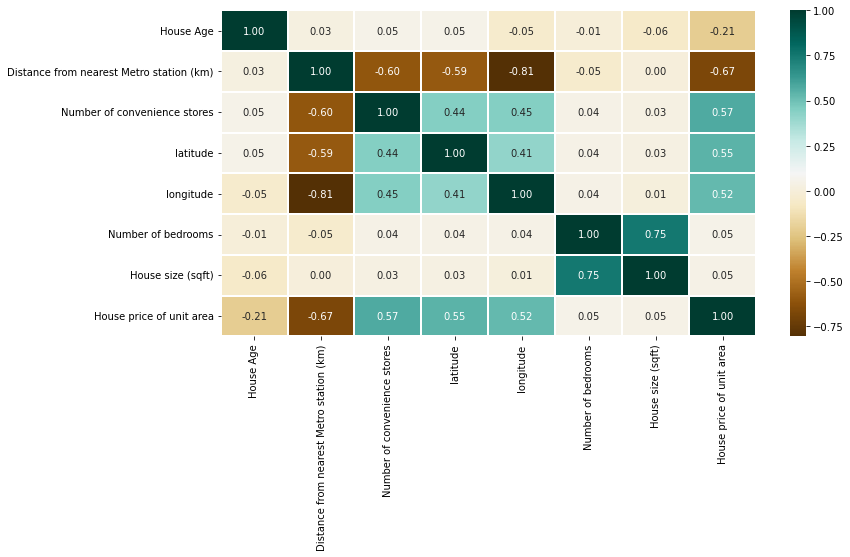

In [5]:

plt.figure(figsize=(12, 6))
sns.heatmap(hp.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<AxesSubplot:>

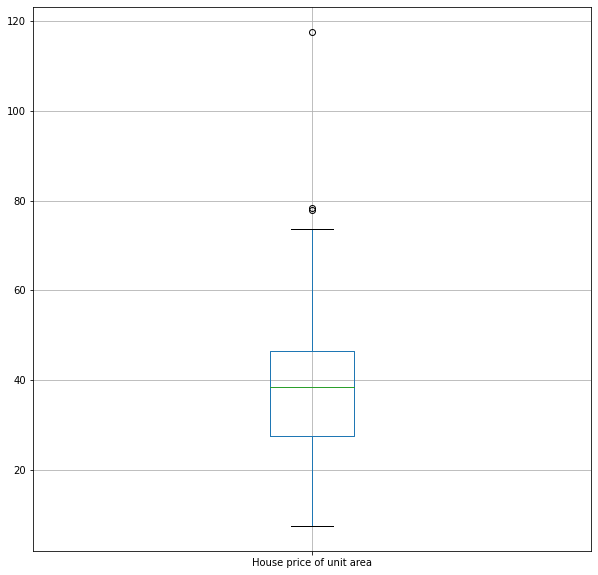

In [6]:
# boxplot 
hp.boxplot(['House price of unit area'], figsize=(10, 10))

In [7]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in hp if len(hp[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [8]:
discrete_feature

['Number of convenience stores', 'Number of bedrooms']

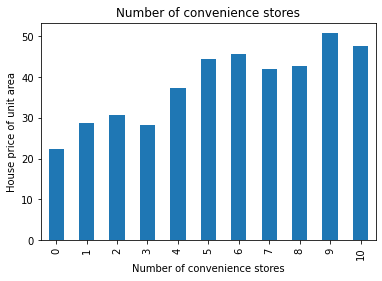

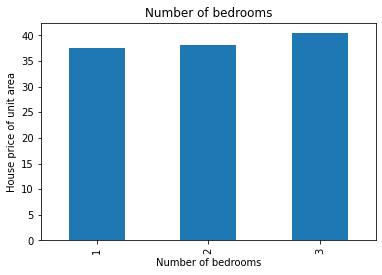

In [9]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=hp.copy()
    data.groupby(feature)['House price of unit area'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('House price of unit area')
    plt.title(feature)
    plt.show()

As we can see the no of bedrooms are approximately fairly distributed. 

In [10]:
#Continuous Variable
continuous_feature=[feature for feature in hp if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


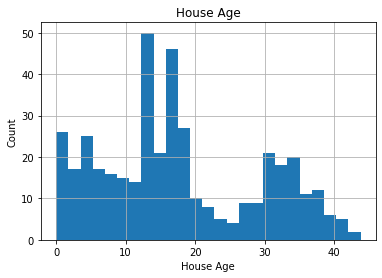

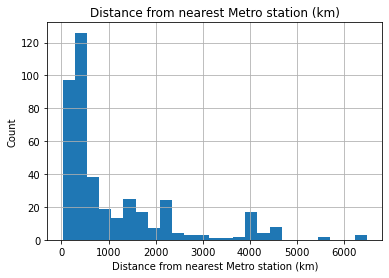

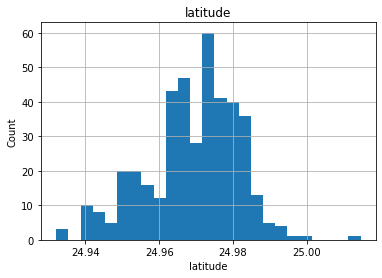

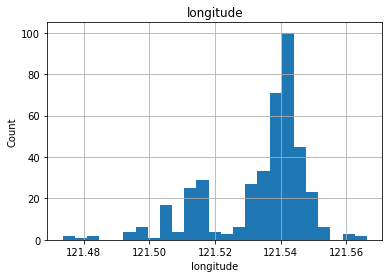

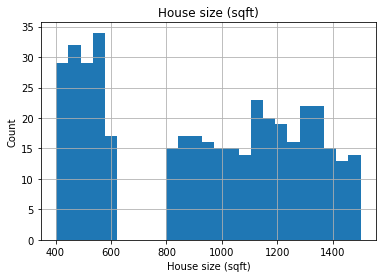

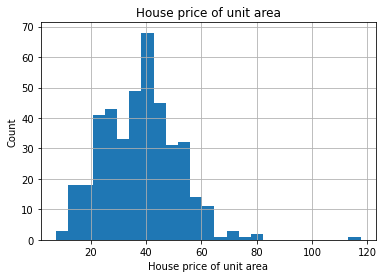

In [11]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=hp.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Visualizing the location of the houses based on latitude and longitude

<Figure size 720x720 with 0 Axes>

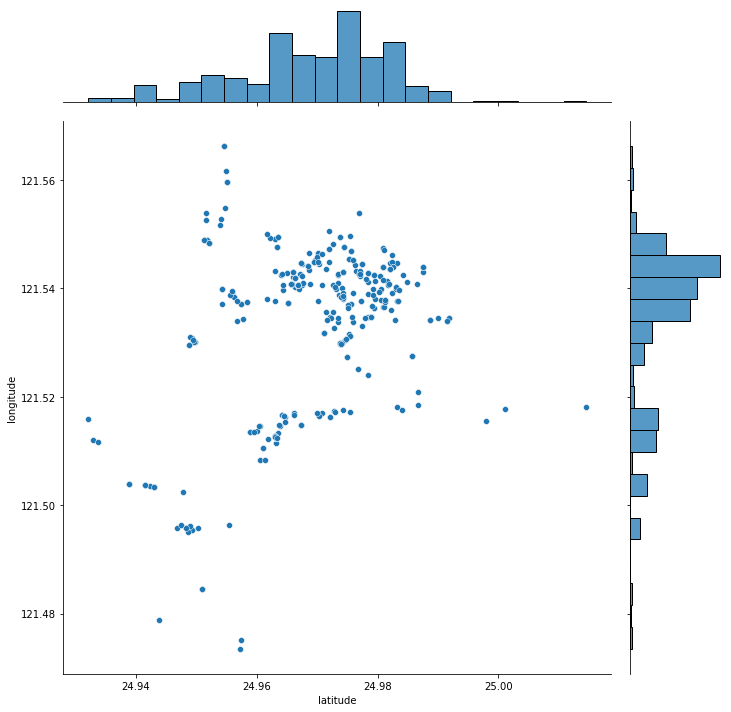

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [24]:
plt.figure(figsize=(10,10))
sns.jointplot(x=hp["latitude"], y=hp["longitude"], size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

sns.despine

In [47]:
#since as we can see from above their is one outlier in the house price which will not have much effect on the dataset hence deleting it.
hp.drop(hp[(hp['House price of unit area']==117.5)].index, inplace=True)

now we’re going to see few common factors affecting the prices of the house and if so ? then by how much ?

Text(0.5, 1.0, 'Price vs Square Feet')

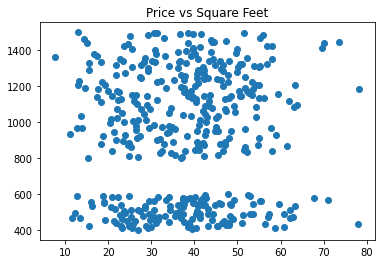

In [48]:
plt.scatter(hp["House price of unit area"],hp["House size (sqft)"])
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'latitude vs Price')

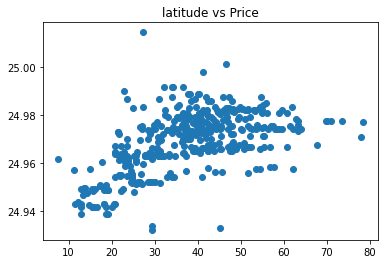

In [49]:
plt.scatter(hp["House price of unit area"],hp["latitude"])
plt.title("latitude vs Price")

Text(0.5, 1.0, 'Longitude vs Price')

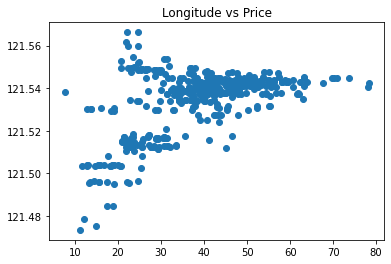

In [50]:
plt.scatter(hp["House price of unit area"],hp["longitude"])
plt.title("Longitude vs Price")

Text(0.5, 1.0, 'Number of bedrooms vs Price')

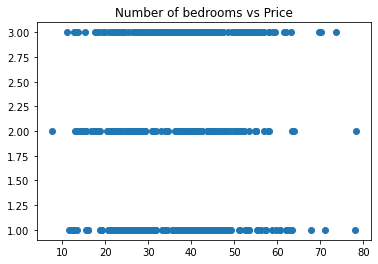

In [51]:
plt.scatter(hp["House price of unit area"],hp["Number of bedrooms"])
plt.title("Number of bedrooms vs Price")

Text(0.5, 1.0, 'House Age vs Price')

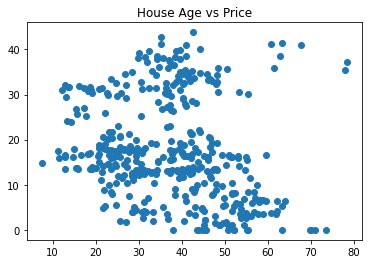

In [52]:
plt.scatter(hp["House price of unit area"],hp["House Age"])
plt.title("House Age vs Price")